In [12]:
import keras 

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_test, y_train = y_test.ravel(), y_train.ravel()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

In [13]:
labels = [
    "airplane", 
    "automobile", 
    "bird", 
    "cat", 
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
    ]
labels_dict = {i: label for i, label in enumerate(labels)}

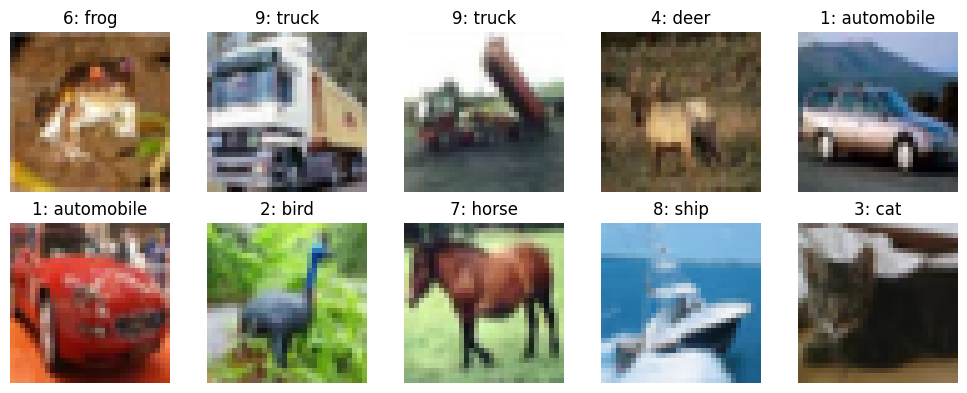

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels_dict[y_train[i]]}")
fig.tight_layout()

In [15]:
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

In [16]:
from keras import layers

def CNN_model(learning_rate= 0.001, drop_rate=0.5, kernels=[32,64]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)

    model = keras.models.Sequential(name="CNN")

    for kern in kernels:
        conv_layer = layers.Conv2D(kern, kernel_size=3, activation='relu', kernel_initializer="he_normal",
                                   input_shape=X_train.shape[1:])
        model.add(conv_layer)
        model.add(layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(256, activation='relu', kernel_initializer="he_normal"))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [18]:
model = CNN_model(.001, .5, [32, 64, 32])
model.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stopper = EarlyStopping(monitor='val_loss', mode='min', patience=15)

model.fit(scaled_X_train, y_train, epochs=100, callbacks=[early_stopper], validation_split=0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.2538 - loss: 1.9683 - val_accuracy: 0.4447 - val_loss: 1.5227
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.4349 - loss: 1.5369 - val_accuracy: 0.5233 - val_loss: 1.3114
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.4934 - loss: 1.3873 - val_accuracy: 0.5807 - val_loss: 1.2022
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.5340 - loss: 1.2911 - val_accuracy: 0.6023 - val_loss: 1.1276
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.5609 - loss: 1.2234 - val_accuracy: 0.6170 - val_loss: 1.0996
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.5739 - loss: 1.1836 - val_accuracy: 0.6357 - val_loss: 1.0391
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.5886 - loss: 1.1453 - val_accuracy: 0.6357 - val_loss: 1.0380
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 

In [20]:
import pandas as pd

metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.319500,1.805523,0.4447,1.522693
1,0.448025,1.501081,0.5233,1.311417
2,0.499725,1.370667,0.5807,1.202156
3,0.538550,1.281930,0.6023,1.127557
4,0.560900,1.223345,0.6170,1.099594


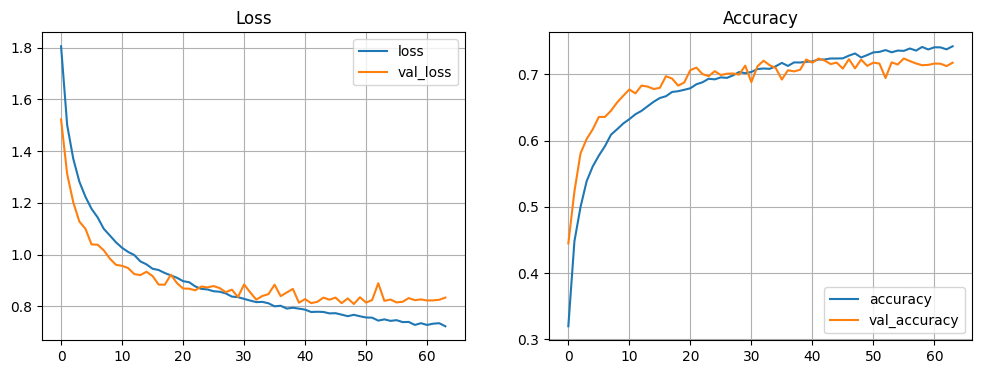

In [22]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    metrics[['loss', 'val_loss']].plot(ax=ax[0], title="Loss", grid=True)
    metrics[['accuracy', 'val_accuracy']].plot(ax=ax[1], title="Accuracy", grid=True)

plot_metrics(metrics)

In [23]:
early_stopper = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(scaled_X_train,
             y_train,
             validation_split=1/6,
             epochs=20,
             callbacks=[early_stopper]
    )
    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics['val_accuracy'].iloc[-1]
    return val_acc

In [24]:
import numpy as np
np.arange(.1, .6, .1)

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [26]:
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    drop_rate = np.round(drop_rate, 1)
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate=drop_rate)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.4021 - loss: 1.7094 - val_accuracy: 0.5754 - val_loss: 1.1814
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.6099 - loss: 1.0993 - val_accuracy: 0.6583 - val_loss: 0.9979
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.6834 - loss: 0.9073 - val_accuracy: 0.6614 - val_loss: 0.9846
Epoch 4/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.7309 - loss: 0.7717 - val_accuracy: 0.6973 - val_loss: 0.8927
Epoch 5/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7772 - loss: 0.6439 - val_accuracy: 0.7007 - val_loss: 0.9053
Epoch 1/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - accuracy: 0.3937 - loss: 1.7249 - val_accuracy: 0.5932 - val_loss: 1.1515
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.6087 - loss: 1.1067 - val_accuracy: 0.6566 - val_loss: 0.9935
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.6763 -

In [27]:
model_final = CNN_model(drop_rate = .2)

model_final.fit(scaled_X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.4373 - loss: 1.5753
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6412 - loss: 1.0184
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7010 - loss: 0.8607
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7466 - loss: 0.7326
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7834 - loss: 0.6202
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8146 - loss: 0.5232
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8463 - loss: 0.4445
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.8695 - loss: 0.3774
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.8858 - loss: 0.3244
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.9049 - loss: 0.2706
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.9151 - loss: 0.2449
Epoch 12

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      1000
           1       0.95      0.72      0.82      1000
           2       0.64      0.59      0.61      1000
           3       0.46      0.68      0.55      1000
           4       0.66      0.68      0.67      1000
           5       0.64      0.62      0.63      1000
           6       0.82      0.69      0.75      1000
           7       0.78      0.70      0.74      1000
           8       0.72      0.89      0.80      1000
           9       0.78      0.83      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.71     10000
weighted avg       0.72      0.70      0.71     10000



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')])

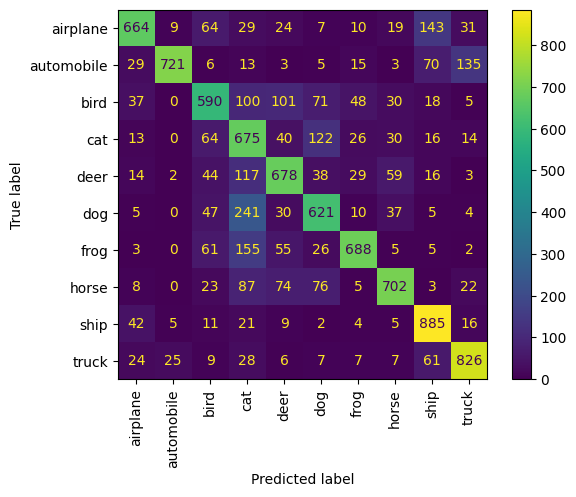

In [28]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(scaled_X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90)